In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pynocular as pn
import numpy as np

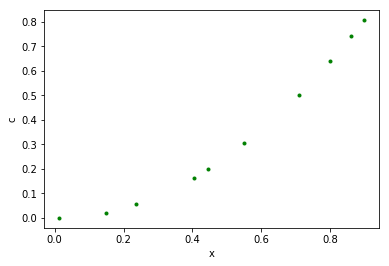

In [2]:
b = pn.PointData()
b['x'] = np.random.rand(10)
b['c'] = b['x']**2
b.plot('x', 'c', 'g.')

Automatic interpolation with respect to x
Automatic interpolation with respect to x
Automatic interpolation with respect to x


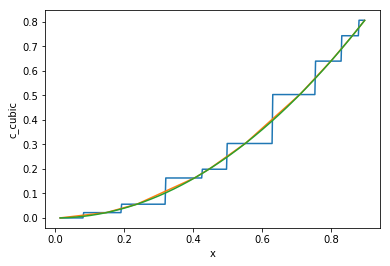

In [3]:
l = pn.PointData()
l['x'] = np.linspace(0,1,500)
l['c_nearest'] = b.interpolate('c', method='nearest')
l['c_linear'] = b.interpolate('c', method='linear')
l['c_cubic'] = b.interpolate('c', method='cubic')
l.plot('x', 'c_nearest')
l.plot('x', 'c_linear')
l.plot('x', 'c_cubic')

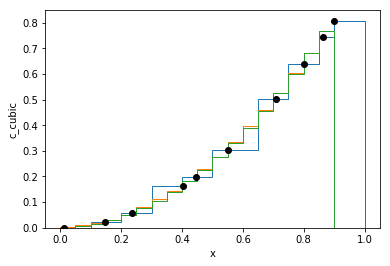

In [4]:
g = pn.GridData()
g.grid['x'].edges = np.linspace(0,1,21)
g['c_nearest'] = b.interpolate('c', method='nearest', fill_value=0)
g['c_linear'] = b.interpolate('c', method='linear', fill_value=0)
g['c_cubic'] = b.interpolate('c', method='cubic', fill_value=0)
b.plot('x', 'c', 'ok')
g.plot_step('c_nearest')
g.plot_step('c_linear')
g.plot_step('c_cubic')

In [5]:
pn.grid

<module 'pynocular.grid' from '/home/peller/pynocular/pynocular/grid.py'>

In [6]:
l['c_win'] = b.window('c', function=np.average, window=[(-0.1,0.1)])
l['c_win_2'] = l.interpolate('c_win', wrt='x', method='linear')
g['c_hist'] = b.histogram('c', function=np.average, fill_value=np.nan)
g['c_hist_2'] = b.histogram('c', function=np.average, fill_value=0)

Automatic with respect to x
(1, 500)


/home/peller/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/peller/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


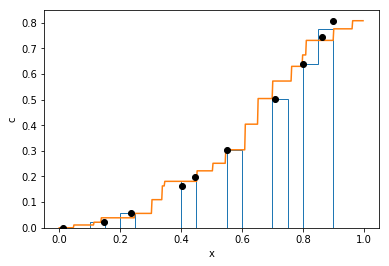

In [7]:
g.plot_step('c_hist')
#g.plot_step('c_hist_i')
#l.plot('x', 'c_win')
l.plot('x', 'c_win_2')
b.plot('x', 'c', 'ok')

In [8]:
g['c_hist_i'] = g.interpolate('c_hist', method='linear')

In [9]:
g['c_hist_i']

array([1.74598856e-04, 1.09839015e-02, 2.17932042e-02, 3.89658765e-02,
       5.61385488e-02, 8.73679104e-02, 1.18597272e-01, 1.49826634e-01,
       1.81055995e-01, 2.22030970e-01, 2.63005946e-01, 3.03980921e-01,
       3.70571311e-01, 4.37161701e-01, 5.03752090e-01, 5.71976119e-01,
       6.40200148e-01, 7.75478345e-01,            nan,            nan])

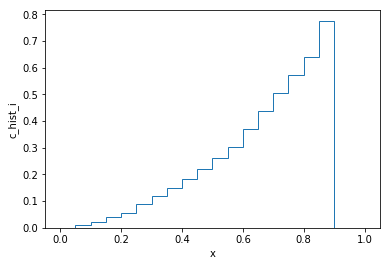

In [10]:
g.plot_step('c_hist_i')


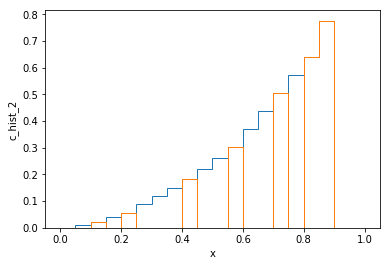

In [11]:
g.plot_step('c_hist_i')
g.plot_step('c_hist_2')

In [12]:
g = pn.GridData()
g.grid['x'].edges = np.linspace(0,1,21)
g.grid['y'].edges = np.linspace(0,1,21)


In [18]:
g.flat('x')

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075,
       0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075,
       0.075, 0.075, 0.075, 0.075, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.175, 0.175, 0.175,
       0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175,
       0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.225,
       0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225,
       0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225,
       0.225, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275,
       0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275,
       0.275, 0.275, 0.275, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325,
       0.325, 0.325,

In [14]:
g['a'] = np.zeros(g.shape)

In [15]:
g['a'].ravel()[3] = 4

In [16]:
g.get_array('a', flat=True)[7] = 5

In [17]:
g['a']

array([[0., 0., 0., 4., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.